<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy 

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


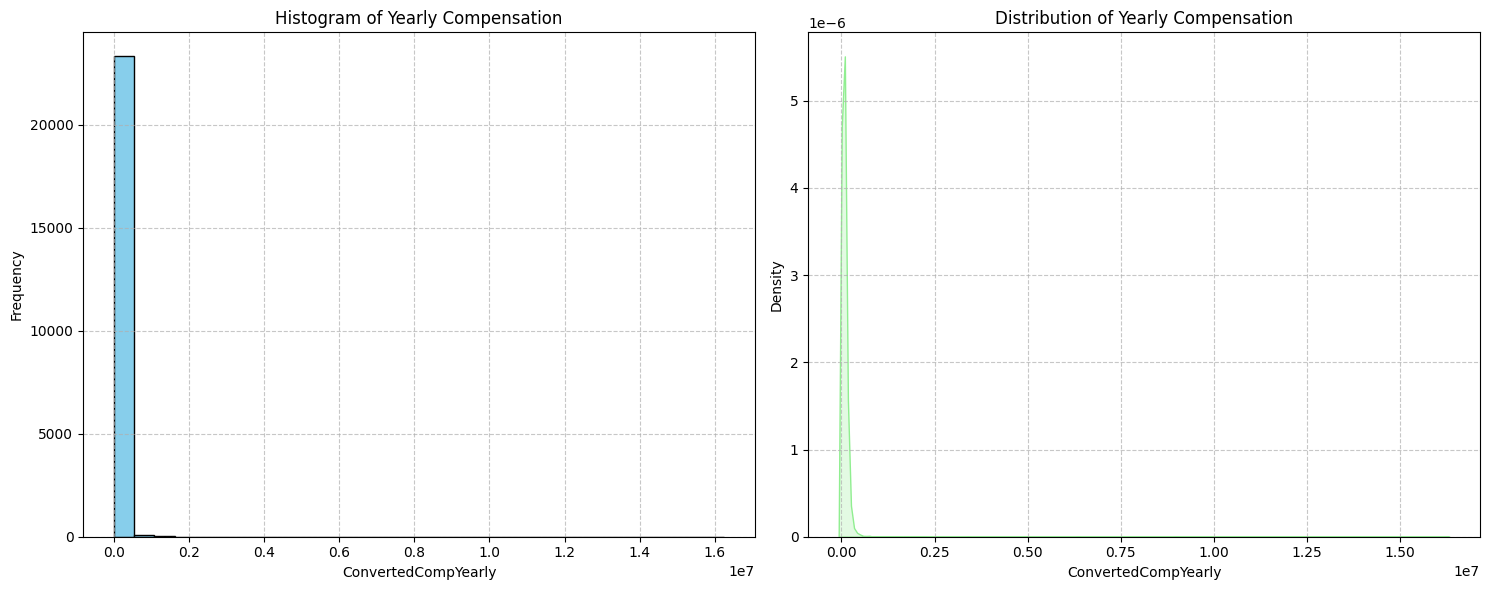

In [3]:
## Write your code here
# 1. Create a histogram to show the distribution
plt.figure(figsize=(15, 6))

# First subplot for a standard histogram
plt.subplot(1, 2, 1)
plt.hist(df['ConvertedCompYearly'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Yearly Compensation')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)

# Second subplot for a KDE (density) plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['ConvertedCompYearly'], fill=True, color='lightgreen')
plt.title('Distribution of Yearly Compensation')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [4]:
## Write your code here
# Filter the dataset for respondents with "Employed, full-time" employment status
full_time_employees = df[df['Employment'] == 'Employed, full-time']

# Calculate the median compensation
median_comp = full_time_employees['ConvertedCompYearly'].median()

# Display the result
print(f"Median yearly compensation for full-time employees: ${median_comp:,.2f}")

Median yearly compensation for full-time employees: $69,814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



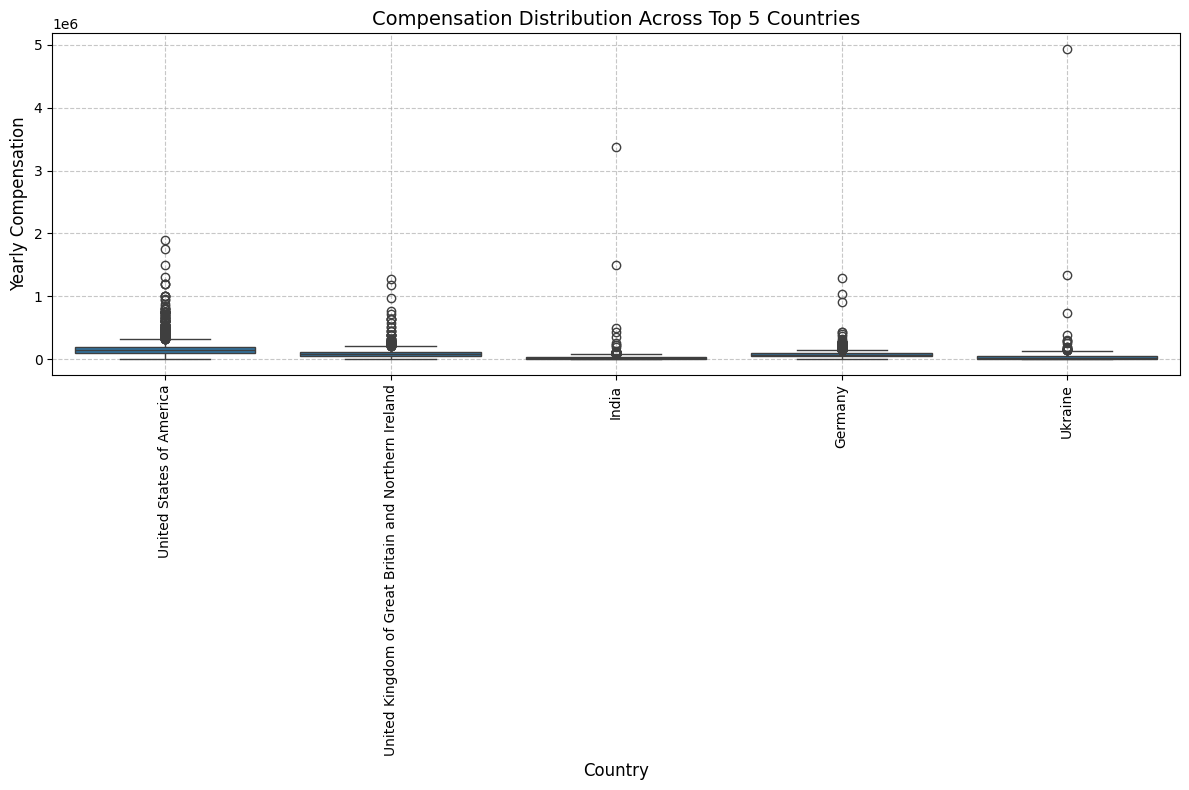

In [8]:
## Write your code here
# First, let's identify the top 5 countries by frequency in the dataset
top_5_countries = df['Country'].value_counts().head(5).index.tolist()

# Filter the data for only these countries
top_countries_df = df[df['Country'].isin(top_5_countries)]

# Create a figure for the box plot
plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(x='Country', y='ConvertedCompYearly', data=top_countries_df)

# Improve the visualization
plt.title('Compensation Distribution Across Top 5 Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Yearly Compensation', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [10]:
## Write your code here
# Calculate the IQR for ConvertedCompYearly
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Determine the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame excluding the outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & 
                    (df['ConvertedCompYearly'] <= upper_bound)]


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


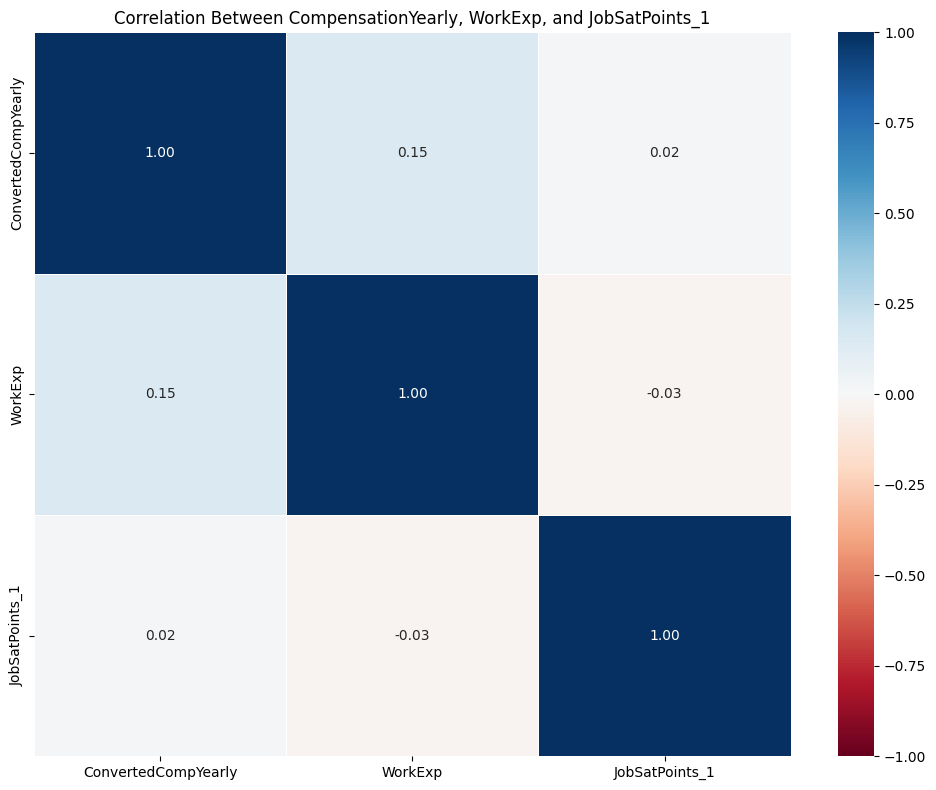

In [11]:
## Write your code here
# Select only the three columns we're interested in
correlation_data = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].copy()

# Drop any rows with missing values in these columns
correlation_data = correlation_data.dropna()

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1, center=0, 
            linewidths=0.5, fmt='.2f')
plt.title('Correlation Between CompensationYearly, WorkExp, and JobSatPoints_1')
plt.tight_layout()
plt.show()


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


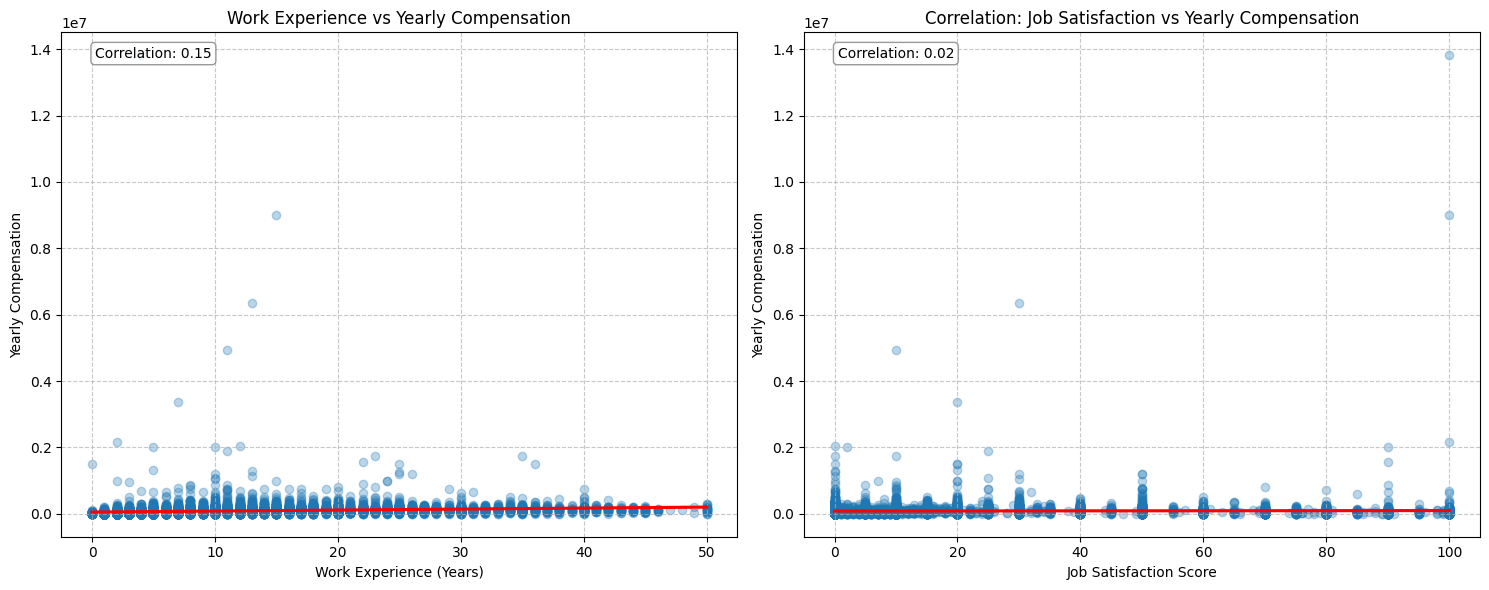

In [12]:
## Write your code here
# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# First subplot: ConvertedCompYearly vs WorkExp
plt.subplot(1, 2, 1)
# Create scatter plot with regression line
sns.regplot(x='WorkExp', y='ConvertedCompYearly', data=df, 
           scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Work Experience vs Yearly Compensation')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation')
plt.grid(True, linestyle='--', alpha=0.7)

# Add correlation coefficient as text
workexp_corr = df['WorkExp'].corr(df['ConvertedCompYearly'])
plt.annotate(f'Correlation: {workexp_corr:.2f}', 
            xy=(0.05, 0.95), xycoords='axes fraction',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Second subplot: ConvertedCompYearly vs JobSatPoints_1
plt.subplot(1, 2, 2)
# Create scatter plot with regression line
sns.regplot(x='JobSatPoints_1', y='ConvertedCompYearly', data=df,
           scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Job Satisfaction vs Yearly Compensation')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Yearly Compensation')
plt.grid(True, linestyle='--', alpha=0.7)

# Add correlation coefficient as text
jobsat_corr = df['JobSatPoints_1'].corr(df['ConvertedCompYearly'])
plt.annotate(f'Correlation: {jobsat_corr:.2f}', 
            xy=(0.05, 0.95), xycoords='axes fraction',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
